### Importar librerias

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import plotly.figure_factory as ff

### Cargar y leer nuestro dataset

In [228]:
df = pd.read_csv('stroke_dataset.csv', sep=',', skiprows=0)

In [229]:
# Descripción de nuestras variables

# gender: Es el género. "Male", "Female" o "Other"
# age: Edad de la persona
# hypertension: 0 si la persona no tiene hipertension, 1 si el paciente tiene hipertension
# heart_disease:0 si el paciente no tiene ninguna enfermedad cardíaca, 1 si el paciente tiene una enfermedad cardíaca
# ever_married: Es siempre casado, "No" o "Yes"
# work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
# Residence_type: "Rural" or "Urban"
# avg_glucose_level: Nivel medio de glucosa en sangre
# bmi: índice de masa corporal
# smoking_status: Estado de fumador, "formerly smoked", "never smoked", "smokes" o "Unknown"
# stroke: Accidente cerebrovascular: 1 si el paciente tuvo un accidente cerebrovascular o 0 si no


In [230]:
print(df.shape)
df.head()

(4981, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [231]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [232]:
# formato de los datos
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [234]:
# Conocer datos nulos
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [235]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [236]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### Comparativa entre si sufrieron ACV y personas sanas

In [237]:
df_stroke_NO = df[df['stroke'] == 0]
df_stroke = df[df['stroke'] == 1]

df_stroke_NO[['age','avg_glucose_level','bmi']].describe()

,age,avg_glucose_level,bmi
count,4733.000000,4733.000000,4733.000000
mean,42.141348,104.569056,28.409698
std,22.345036,43.602188,6.833637
min,0.080000,55.120000,14.000000
25%,24.000000,77.120000,23.500000
50%,43.000000,91.450000,28.000000
75%,60.000000,112.620000,32.600000
max,82.000000,267.760000,48.900000


In [238]:
df_stroke[['age','avg_glucose_level','bmi']].describe()

,age,avg_glucose_level,bmi
count,248.000000,248.000000,248.000000
mean,67.819839,132.175565,30.186694
std,12.670565,61.771083,5.658245
min,1.320000,56.110000,16.900000
25%,59.000000,79.572500,26.975000
50%,71.000000,105.040000,29.450000
75%,78.000000,195.960000,32.650000
max,82.000000,271.740000,48.900000


In [239]:
# Personas que sufrieron un ACV: 
# tienen  mayor media y mediana de edades que las que no. 
# Lo mismo se cumple para el promedio de glucosa en sangre.

#### 1. Edad

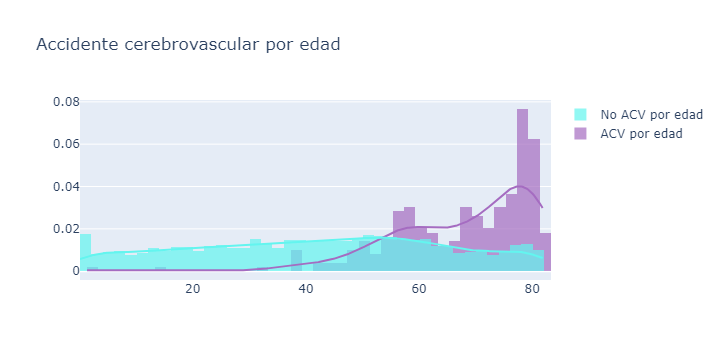

In [240]:
hist_data = [df_stroke['age'], df_stroke_NO['age']]

group_labels = ['ACV por edad', 'No ACV por edad']
colors = ['#A56CC1', '#63F5EF']

fig = ff.create_distplot(hist_data, group_labels, bin_size=2, colors=colors, show_rug=False)
fig.update_layout(title_text='Accidente cerebrovascular por edad')

fig.show()

##### Vemos la distribucion por edades en personas que padecieron un ACV sobre las que no. Se observa que la mayoria de personas que padecieron un accidente cerebrovascular tienen edades mayores a 55 años.

#### 2. Nivel promedio de glucosa en sangre


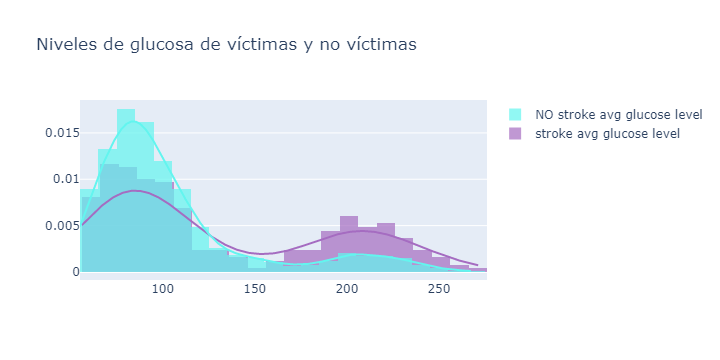

In [241]:
hist_data = [df_stroke['avg_glucose_level'], df_stroke_NO['avg_glucose_level']]

group_labels = ['stroke avg glucose level', 'NO stroke avg glucose level']
colors = ['#A56CC1', '#63F5EF']

fig = ff.create_distplot(hist_data, group_labels, bin_size=10, colors=colors, show_rug=False)
fig.update_layout(title_text='Niveles de glucosa de víctimas y no víctimas')

fig.show()

##### Si atendemos a que la diabetes es un factor de riesgo importante para el accidente cerebrovascular, comprobamos que en el gráfico se ve que las personas víctimas de ACV tienen niveles de glucosa mas altos que las personas que no.

#### 3. Índice de masa moscular

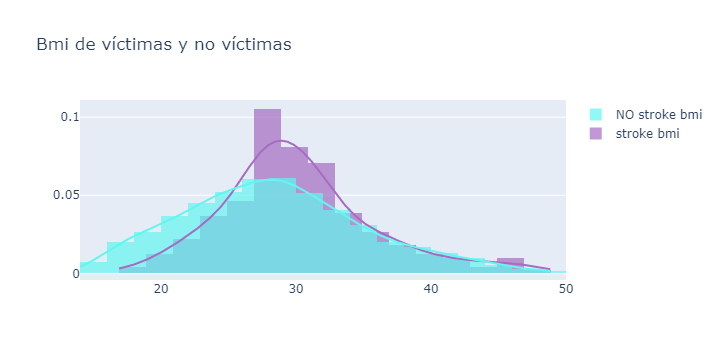

In [242]:
hist_data = [df_stroke['bmi'].dropna(), df_stroke_NO['bmi'].dropna()]

group_labels = ['stroke bmi', 'NO stroke bmi']
colors = ['#A56CC1', '#63F5EF']

fig = ff.create_distplot(hist_data, group_labels, bin_size=2, colors=colors, show_rug=False)
fig.update_layout(title_text='Bmi de víctimas y no víctimas')

fig.show()

##### Según muestra el gráfico, el índice de masa corporal parece igual de manera igual para los dos grupos.

#### 4. Género

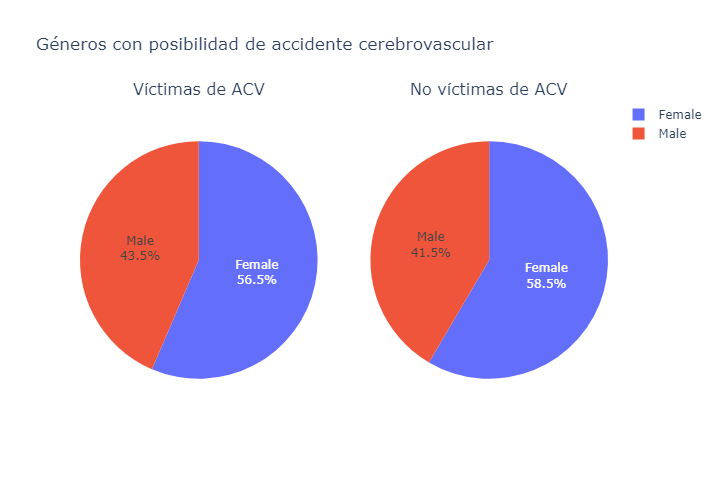

In [243]:
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "domain"}, {"type": "domain"}]],
    subplot_titles=("Víctimas de ACV", 
                    "No víctimas de ACV")
)

grupo_gender = df_stroke.groupby(['gender'])['stroke'].count().reset_index()
fig.add_trace(go.Pie(values=grupo_gender['stroke'], labels=grupo_gender['gender'], textinfo='label+percent'),
              row=1, col=1)

grupo_gender = df_stroke_NO.groupby(['gender'])['stroke'].count().reset_index()
fig.add_trace(go.Pie(values=grupo_gender['stroke'], labels=grupo_gender['gender'], textinfo='label+percent'),
              row=1, col=2)

fig.update_layout(title='Géneros con posibilidad de accidente cerebrovascular', height=500)

fig.show()

 ##### En el gráfico se muestra como el porcentaje de mujeres es ligeramente mayor entre las víctimas.

#### 5. La hipertensión

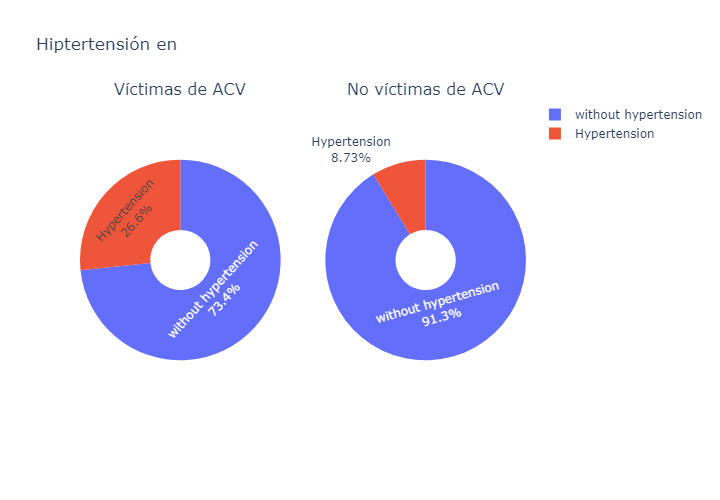

In [244]:
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "domain"}, {"type": "domain"}]],
    subplot_titles=("Víctimas de ACV",
                    "No víctimas de ACV")
)

group_hypertension = df_stroke.groupby(['hypertension'])['stroke'].count().reset_index()
group_hypertension['hypertension'] = np.where(group_hypertension['hypertension'] == 1, 'Hypertension', 'without hypertension')
fig.add_trace(go.Pie(values=group_hypertension['stroke'], labels=group_hypertension['hypertension'], hole=.3, textinfo='label+percent'),
              row=1, col=1)

group_hypertension = df_stroke_NO.groupby(['hypertension'])['stroke'].count().reset_index()
group_hypertension['hypertension'] = np.where(group_hypertension['hypertension'] == 1, 'Hypertension', 'without hypertension')
fig.add_trace(go.Pie(values=group_hypertension['stroke'], labels=group_hypertension['hypertension'], hole=.3, textinfo='label+percent'),
              row=1, col=2)

fig.update_layout(title='Hiptertensión en', height=500)

fig.show()

##### El porcentaje de personas que padecen hipertensión es mayor en aquellas que tuvieron un accidente cerebrovascular que en las que nunca tuvieron este tipo de problema. .

In [245]:
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "domain"}, {"type": "domain"}]],
    subplot_titles=("Con hipertensión", 
                    "Sin hipertensión")
)

df_ht = df[df['hypertension'] == 1]
df_ht_NO = df[df['hypertension'] == 0]


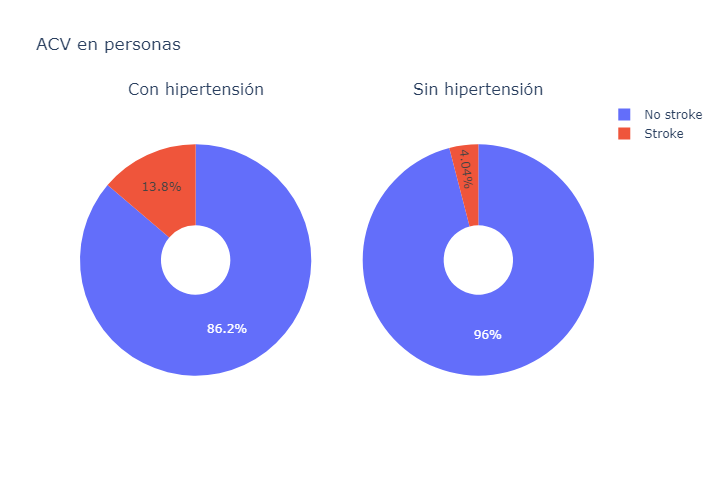

In [246]:
grupo_hypertension = df_ht.groupby('stroke').agg({'stroke':'count'}).rename(columns={'stroke':'count'}).reset_index()
grupo_hypertension['stroke'] = np.where(grupo_hypertension['stroke'] == 1, 'Stroke', 'No stroke')
fig.add_trace(go.Pie(values=grupo_hypertension['count'], labels=grupo_hypertension['stroke'], hole=0.3),
              row=1, col=1)

grupo_hypertension = df_ht_NO.groupby('stroke').agg({'stroke':'count'}).rename(columns={'stroke':'count'}).reset_index()
grupo_hypertension['stroke'] = np.where(grupo_hypertension['stroke'] == 1, 'Stroke', 'No stroke')
fig.add_trace(go.Pie(values=grupo_hypertension['count'], labels=grupo_hypertension['stroke'], hole=0.3),
              row=1, col=2)

fig.update_layout(title='ACV en personas', height=500)

fig.show()

##### Aquí también vemos como el porcentaje de victimas en accidente cerebrovascular es mayor (13%) en las personas que padecen hipertensión que en las que no (3%).

#### 6. Enfermedades cardíacas

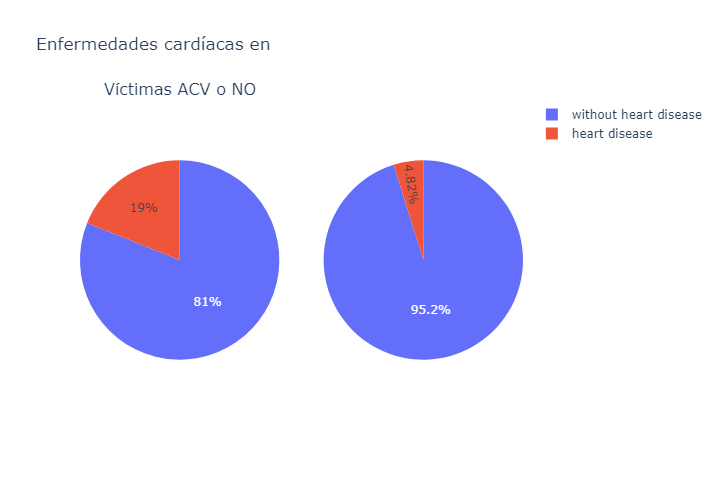

In [247]:
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "domain"}, {"type": "domain"}]],
    subplot_titles=("Víctimas ACV o NO", 
                    "")
)

group_heart_disease = df_stroke.groupby(['heart_disease'])['stroke'].count().reset_index()
group_heart_disease['heart_disease'] = np.where(group_heart_disease['heart_disease'] == 1,'heart disease','without heart disease')
fig.add_trace(go.Pie(values=group_heart_disease['stroke'], labels=group_heart_disease['heart_disease']),
              row=1, col=1)

group_heart_disease = df_stroke_NO.groupby(['heart_disease'])['stroke'].count().reset_index()
group_heart_disease['heart_disease'] = np.where(group_heart_disease['heart_disease'] == 1,'heart disease','without heart disease')
fig.add_trace(go.Pie(values=group_heart_disease['stroke'], labels=group_heart_disease['heart_disease']),
              row=1, col=2)

fig.update_layout(title='Enfermedades cardíacas en', height=500)

fig.show()


##### Las enfermedades cardíacas guardan estrecha relacion con el ACV.

##### Otro gráfico donde se aprecia el porcentaje de personas que padecieron un acv siendo mayor en aquellas que tienen algun tipo de problema cardíaco que en las que no.

#### 7. Si está o no casada la persona

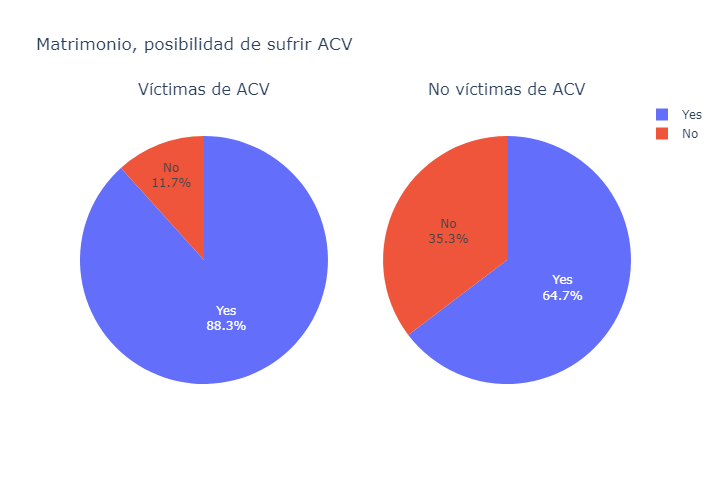

In [248]:
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "domain"}, {"type": "domain"}]],
    subplot_titles=("Víctimas de ACV", 
                    "No víctimas de ACV")
)

group_ever_married = df_stroke.groupby(['ever_married'])['stroke'].count().reset_index()
fig.add_trace(go.Pie(values=group_ever_married['stroke'], labels=group_ever_married['ever_married'], textinfo='label+percent'),
              row=1, col=1)

group_ever_married = df_stroke_NO.groupby(['ever_married'])['stroke'].count().reset_index()
fig.add_trace(go.Pie(values=group_ever_married['stroke'], labels=group_ever_married['ever_married'], textinfo='label+percent'),
              row=1, col=2)

fig.update_layout(title='Matrimonio, posibilidad de sufrir ACV', height=500)

fig.show()

##### Podemos observar que el porcentaje de personas casadas es notablemete superior entre las víctimas de ACV. 

##### Fumar

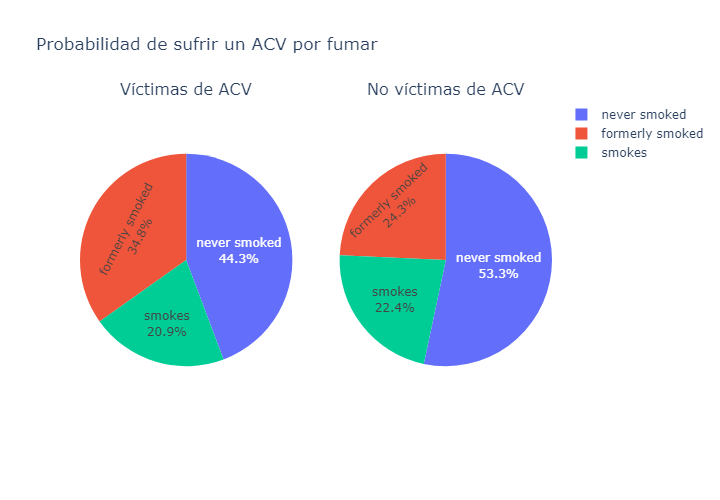

In [249]:
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "domain"}, {"type": "domain"}]],
    subplot_titles=("Víctimas de ACV", 
                    "No víctimas de ACV")
)

group_smoking_status = df_stroke.groupby(['smoking_status'])['stroke'].count().reset_index()
group_smoking_status = group_smoking_status[group_smoking_status['smoking_status'] != 'Unknown']
fig.add_trace(go.Pie(values=group_smoking_status['stroke'], labels=group_smoking_status['smoking_status'], textinfo='label+percent'),
              row=1, col=1)

group_smoking_status = df_stroke_NO.groupby(['smoking_status'])['stroke'].count().reset_index()
group_smoking_status = group_smoking_status[group_smoking_status['smoking_status'] != 'Unknown']
fig.add_trace(go.Pie(values=group_smoking_status['stroke'], labels=group_smoking_status['smoking_status'], textinfo='label+percent'),
              row=1, col=2)

fig.update_layout(title='Probabilidad de sufrir un ACV por fumar', height=500)

fig.show()

In [250]:
# Según el gráfico parece que entre fumar y no fumar no exista relación con el ACV

#### 8. Por tipo de residencia


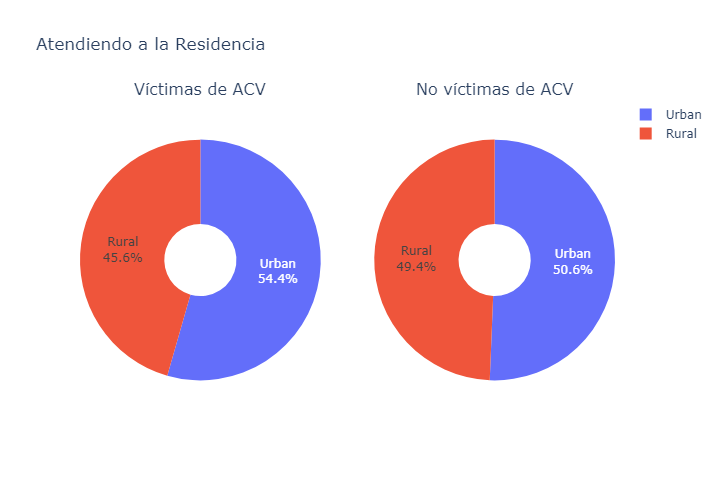

In [251]:
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "domain"}, {"type": "domain"}]],
    subplot_titles=("Víctimas de ACV", 
                    "No víctimas de ACV")
)

group_residence = df_stroke.groupby(['Residence_type'])['stroke'].count().reset_index()
fig.add_trace(go.Pie(values=group_residence['stroke'], labels=group_residence['Residence_type'], hole=0.3, textinfo='label+percent'),
              row=1, col=1)

group_residence = df_stroke_NO.groupby(['Residence_type'])['stroke'].count().reset_index()
fig.add_trace(go.Pie(values=group_residence['stroke'], labels=group_residence['Residence_type'], hole=0.3, textinfo='label+percent'),
              row=1, col=2)

fig.update_layout(title='Atendiendo a la Residencia', height=500)

fig.show()

##### No parece existir relación entre la residencia de la persona (urbana o rural) y la posibilidad de tener un ACV.

#### 9. Tipo de trabajo


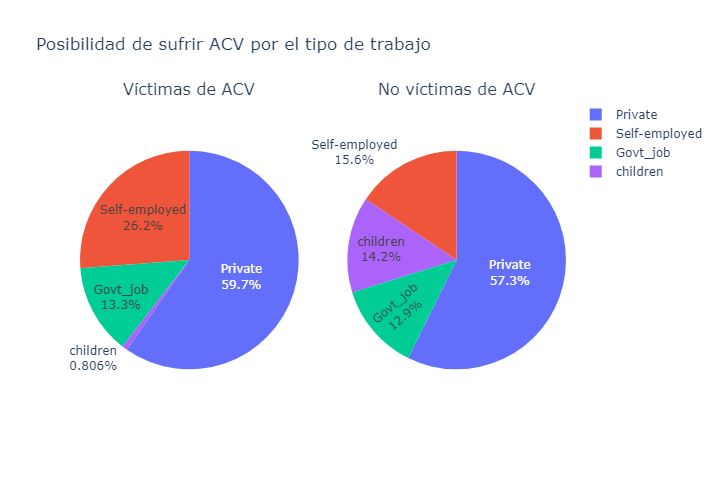

In [252]:
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "domain"}, {"type": "domain"}]],
    subplot_titles=("Víctimas de ACV", 
                    "No víctimas de ACV")
)

group_work_type = df_stroke.groupby(['work_type'])['stroke'].count().reset_index()
fig.add_trace(go.Pie(values=group_work_type['stroke'], labels=group_work_type['work_type'], textinfo='label+percent'),
              row=1, col=1)

group_work_type = df_stroke_NO.groupby(['work_type'])['stroke'].count().reset_index()
fig.add_trace(go.Pie(values=group_work_type['stroke'], labels=group_work_type['work_type'], textinfo='label+percent'),
              row=1, col=2)

fig.update_layout(title='Posibilidad de sufrir ACV por el tipo de trabajo', height=500)

fig.show()

##### Los tipos de trabajos se relacionan de igual manera en los dos grupos, lo que hace pensar que no es una variable relevante a tener en cuenta.

### Análisis de la relación que existe entre las variables continuas:


In [253]:
# Con el fin de solucionar el desbalance que hay en el dataset, 
# voy a balancearlo hacia la clase con menor cantidad de ocurrencias (stroke = 1)
# esto hará que se descarten la mayoría de los ejemplos, 
# pero al menos nos quedarán aproximadamente 500 datos para:
# entrenar, testear y graficar de manera mas simple.

In [254]:
print(df_stroke.shape)
print(df_stroke_NO.shape)

df_stroke_NO = df_stroke_NO.sample(df_stroke.shape[0])
df = df_stroke.append(df_stroke_NO)

print(df.shape)

(248, 11)
(4733, 11)
(496, 11)


#### 1. Edad, índice de masa corporal y promedio de glucosa en sangre


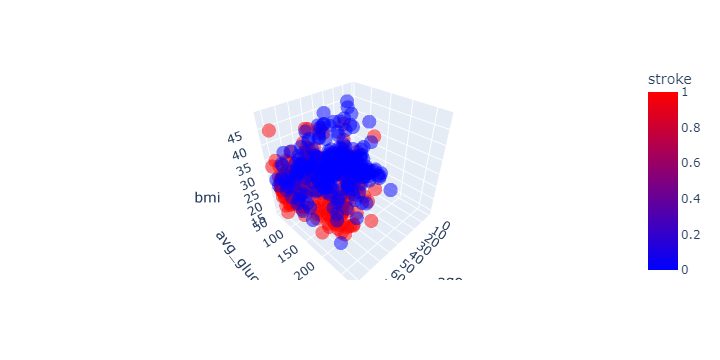

In [255]:
fig = px.scatter_3d(df, x='age', y='avg_glucose_level', z='bmi',
              color='stroke', color_continuous_scale='bluered', opacity=0.5)
fig.show()

##### En el gráfico 3D podemos observar como se relacionan estas tres variables entre si desde distintas perspectivas. Los puntos rojos representan a personas que tuvieron ACV mientras que los azules representan a las que no.

#### 2. Promedio de glucosa en funcion de la edad

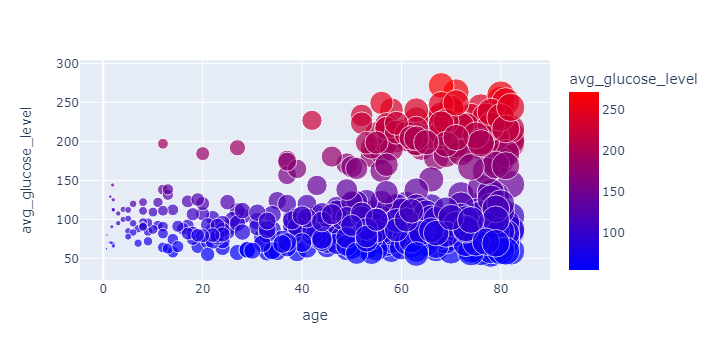

In [256]:
fig = px.scatter(df, x="age", y="avg_glucose_level", color="avg_glucose_level", color_continuous_scale='bluered',
                 size='age', hover_data=['bmi'])
fig.show()


##### En el anterior gráfico vemos el nivel promedio de glucosa en sangre en función de la edad. Parece que no hay muchas personas menores a 35 años con niveles de glucosa superiores a 150 mg/dl. Si que se observa que en edades superiores a 35 años hay dos nubes de puntos, que se orientan una por encima de los 150 mg/dl llegando hasta los 250 mg/dl y otra por debajo cerca de los 100 mg/dl

En la info del dataset no menciona la unidad de medida del promedio de glucosa en sangre, pero leyendo y documentándome su unidad es mg/dl. 


#### 3. Índice de masa corporal en funcion del promedio de glucosa

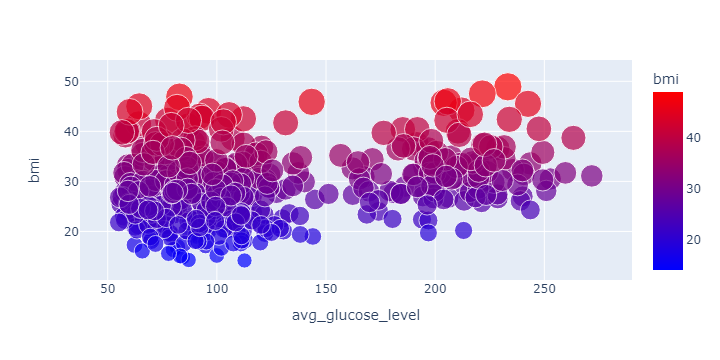

In [257]:
fig = px.scatter(df, x="avg_glucose_level", y="bmi", color="bmi", color_continuous_scale='bluered',
                 size='bmi', hover_data=['bmi'])
fig.show()

##### Observamos que las personas que tienen un mayor promedio de glucosa en sangre tienden a tener un mayor indice de masa corporal.

#### 4. Índice de masa corporal en funcion de la edad

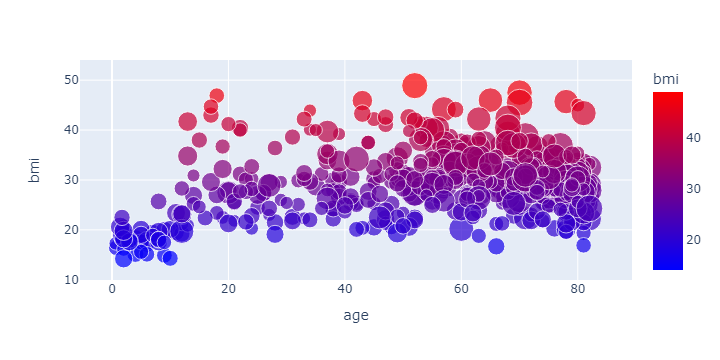

In [258]:
fig = px.scatter(df, x="age", y="bmi", color="bmi", color_continuous_scale='bluered',
                 size='avg_glucose_level', hover_data=['bmi'])
fig.show()

##### Al observar cómo se relaciona el BMI en función de la edad, vemos que a partir de los 20 años (aproximadamente) pues la gran mayoria de ejemplos oscilan entre 20 y 40, mientras que algunos outliers se encuentran por encima o por debajo.

##### Conclusiones

En nuestro análisis exploratorio del conjunto de datos, podemos concluir que la edad es una variable altamente relacionada con la posibilidad de padecer un accidente cerbrovascular, ya que la distribución de edades de las víctimas, se agrupa en torno a los 50-80 años de edad, contrario a la del resto de persona. 

El nivel promedio de glucosa en sangre parece ser una variable de interés, ya que en las personas que sufrieron un accidente cerebrovascular tuvieron valores superiores o inferiores al del resto de personas.

De gran importancia también la hipertensión y enfermedades cardíacas pues son riesgos que alerta en la predicción de un posible ACV, ya que se comprueba que el porcentaje de victimas es mayor en las personas que padecen alguno de estos factores. 

Por último, los datos indican que no existe una predominancia sobre alguno de los sexos dentro del conjunto de personas víctimas de ACV.